In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

### Reading an image into a given representation

In [25]:
def imReadAndConvert(filename:str, representation:int)->np.ndarray:
    if representation == 1:
        img = cv2.imread(filename,0)
    elif representation == 2:
        img = cv2.imread(filename)
    img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    norm_img = normalize(img_rgb)
    return norm_img

def normalize(img):
    h,w = img.shape[:2]
    norm_img = np.zeros(img.shape)
    for i in range(h):
        for j in range(w):
            norm_img[i,j] = img[i,j]/255
    return norm_img

def unnormalize(img):
    h,w = img.shape[:2]
    norm_img = np.zeros(img.shape)
    for i in range(h):
        for j in range(w):
            norm_img[i,j] = img[i,j]*255
    return norm_img.astype('uint32')

### Displaying an image

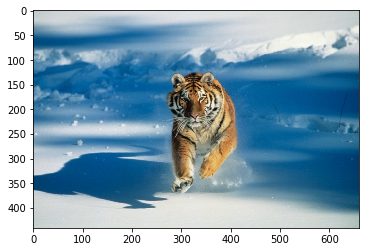

In [3]:
def imDisplay(filename:str, representation:int):
    img = imReadAndConvert(filename, representation)
    plt.imshow(img);

imDisplay('pool.jpg',2)

### Transforming an RGB image to YIQ color space

In [94]:
def transformRGB2YIQ(imRGB:np.ndarray)->np.ndarray:
    yiqMat = np.array([[0.299, 0.587, 0.144],[0.596, -0.275, -0.321],[0.212, -0.523, 0.311]])
    h,w = imRGB.shape[:2]
    imYIQ = np.zeros([h,w,3])
    for i in range(h):
        for j in range(w):
            imYIQ[i,j] = imRGB[i,j].dot(yiqMat)
#     return np.clip(imYIQ, a_min = 0, a_max = 1) 
    return imYIQ

def transformYIQ2RGB(imYIQ:np.ndarray)->np.ndarray:
    yiqMat = np.array([[0.299, 0.587, 0.144],[0.596, -0.275, -0.321],[0.212, -0.523, 0.311]])
    rgbMat = np.linalg.inv(yiqMat)
    h,w = imYIQ.shape[:2]
    imRGB = np.zeros([h,w,3])
    for i in range(h):
        for j in range(w):
            imRGB[i,j] = imYIQ[i,j].dot(rgbMat)
    imRGB = unnormalize(imRGB).astype('uint8')
    return normalize(imRGB)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


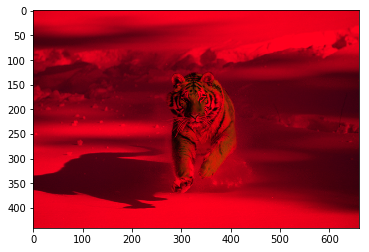

In [95]:
yiq = transformRGB2YIQ(imReadAndConvert('pool.jpg',2))
plt.imshow(yiq[:,:,:]);

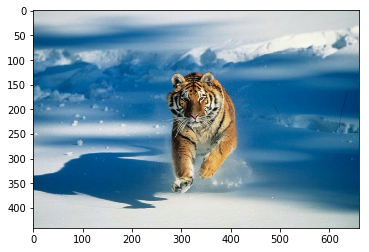

In [96]:
rgb = transformYIQ2RGB(yiq)
plt.imshow(rgb);

### Histogram equalization

In [192]:
def plotHist(hist, img):
    unnorm = unnormalize(img)
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()
    plt.plot(cdf_normalized, color = 'b')
    plt.hist(unnorm.flatten(),256,[0,256], color = 'r')
    plt.xlim([0,256])
    plt.legend(('cdf','histogram'), loc = 'upper left')
    plt.show()

def histogramEqualizeGrayscale(imOrig:np.ndarray)->(np.ndarray,np.ndarray,np.ndarray):
    unnorm = unnormalize(imOrig)
    hist,bins = np.histogram(unnorm.flatten(),256,[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()

    cdf_m = np.ma.masked_equal(cdf,0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint8')
    res = cdf[unnorm]
    hist2,bins2 = np.histogram(res.flatten(),256,[0,256])
    return (res, hist, hist2)

def histogramEqualizeRGB(imOrig:np.ndarray)->(np.ndarray,np.ndarray,np.ndarray):
    imYIQ = transformRGB2YIQ(imOrig)
    unnorm = np.float32(unnormalize(imYIQ[:,:,0]))
    clipped_YIQ = np.zeros(unnorm.shape)
    y_min = np.amin(unnorm)
    y_max = np.amax(unnorm)
    cv2.normalize(unnorm, unnorm, 0, 255, cv2.NORM_MINMAX)

    hist,bins = np.histogram(unnorm.flatten(),256,[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()

    cdf_m = np.ma.masked_equal(cdf,0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint8')
    res = cdf[unnorm.astype('uint8')]
    hist2,bins2 = np.histogram(res.flatten(),256,[0,256])

    cv2.normalize(res, res, y_min, y_max, cv2.NORM_MINMAX)
    res = normalize(res)
    imYIQ[:,:,0] = res
    imRGB = transformYIQ2RGB(imYIQ)
    return (imRGB, hist, hist2)

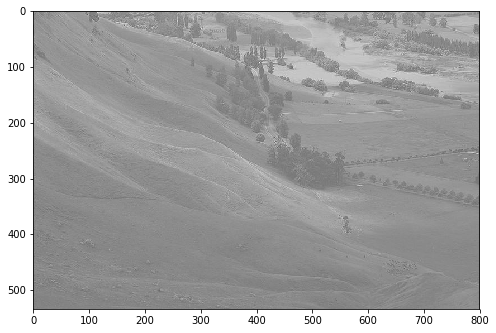

In [149]:
img = imReadAndConvert('hawkes_bay_in.jpg', 1)
plt.figure(figsize = (8,8))
plt.imshow(img)

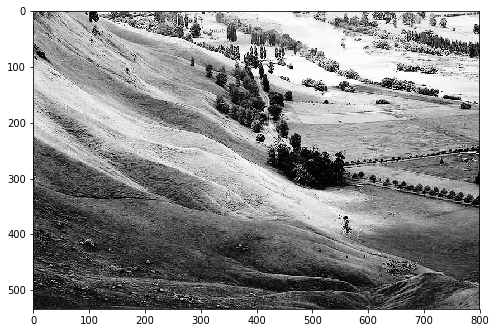

In [150]:
res = histogramEqualizeGrayscale(img)
plt.figure(figsize = (8,8))
plt.imshow(res[0])

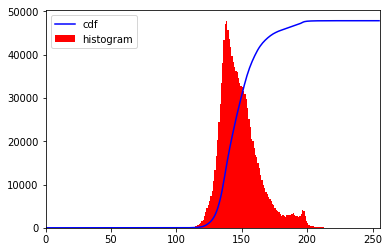

In [151]:
plotHist(res[1], img)

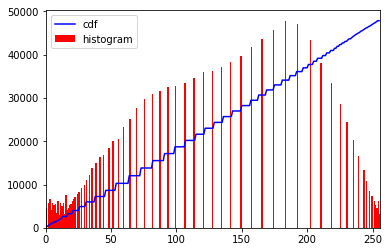

In [152]:
plotHist(res[2], res[0])

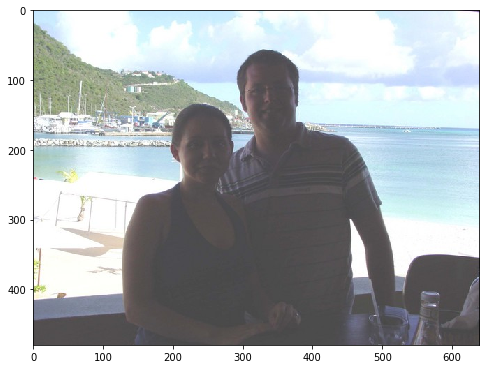

In [193]:
img = imReadAndConvert('peps.jpg', 2)
plt.figure(figsize = (8,8))
plt.imshow(img)

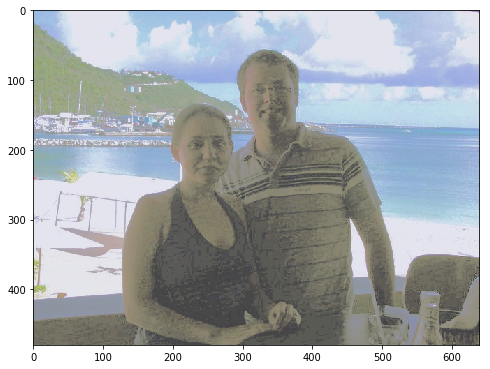

In [194]:
res = histogramEqualizeRGB(img)
plt.figure(figsize = (8,8))
plt.imshow(res[0])

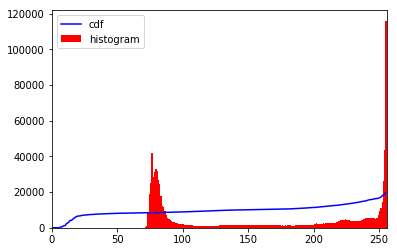

In [195]:
plotHist(res[1], img)

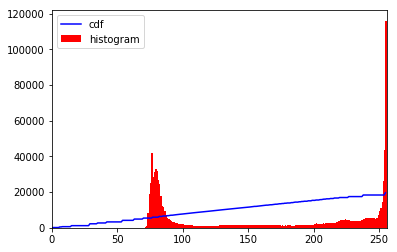

In [196]:
plotHist(res[2], img)

### Optimal image quantization

In [17]:
def quantizeImage(imOrig:np.ndarray, nQuant:int, nIter:int)->(List[np.ndarray],List[float]):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-17-efc9aab5e910>, line 2)